# Assignemnt 10 Data Visualization III

## Import Required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Import dataset

In [2]:
df=pd.read_csv("Iris.csv")

## Data Preprocessing

In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.info

<bound method DataFrame.info of       Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0      1            5.1           3.5            1.4           0.2   
1      2            4.9           3.0            1.4           0.2   
2      3            4.7           3.2            1.3           0.2   
3      4            4.6           3.1            1.5           0.2   
4      5            5.0           3.6            1.4           0.2   
..   ...            ...           ...            ...           ...   
145  146            6.7           3.0            5.2           2.3   
146  147            6.3           2.5            5.0           1.9   
147  148            6.5           3.0            5.2           2.0   
148  149            6.2           3.4            5.4           2.3   
149  150            5.9           3.0            5.1           1.8   

            Species  
0       Iris-setosa  
1       Iris-setosa  
2       Iris-setosa  
3       Iris-setosa  
4       Iris-seto

In [5]:
df.shape

(150, 6)

In [6]:
df.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

<h4>Removing Unwanted Column</h4>

In [7]:
df=df.iloc[:,1:]

In [8]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


<h4>Checking missing values</h4>

In [9]:
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

<h4>List of the features and their types (e.g., numeric, nominal) available in the dataset.</h4>

In [10]:
numeric_features = df._get_numeric_data().columns 
for i in numeric_features:
    print(i," : Numeric")
print('Species : Nominal')

SepalLengthCm  : Numeric
SepalWidthCm  : Numeric
PetalLengthCm  : Numeric
PetalWidthCm  : Numeric
Species : Nominal


<h4>Create a histogram for each feature in the dataset to illustrate the feature distributions. </H4>

In [11]:
cols=['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
cols

['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

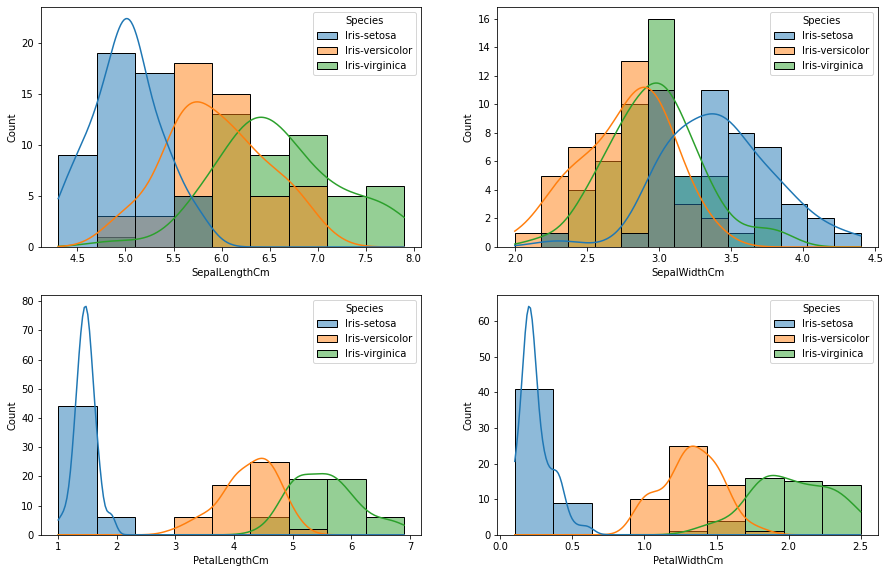

In [12]:
plt.figure(figsize=(15,15))
t=1
for i in cols:
    plt.subplot(3,2,t)
    t+=1
    sns.histplot(x=df[i],hue=df["Species"],kde=True)

<AxesSubplot:xlabel='Species', ylabel='Count'>

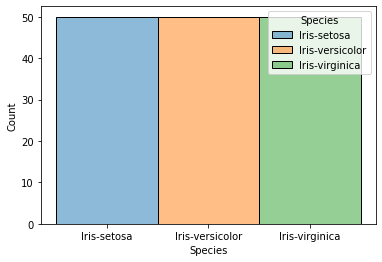

In [13]:
sns.histplot(x=df['Species'],hue=df["Species"],kde=True)

<h3>Create a boxplot for each feature in the dataset. </h3>

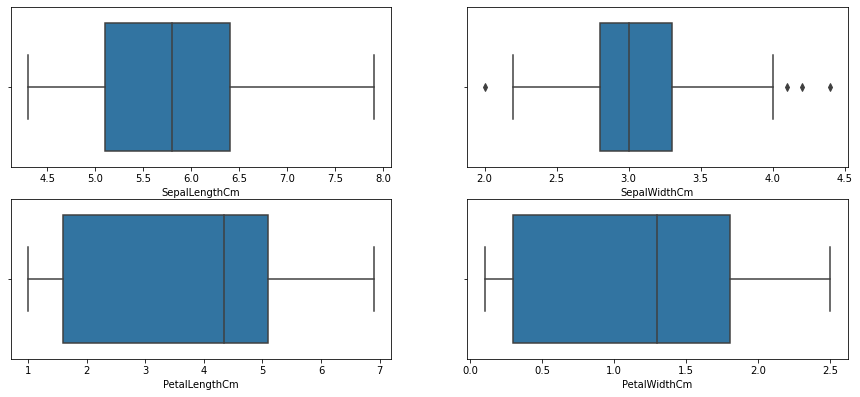

In [14]:
plt.figure(figsize=(15,10))
t=1
for i in cols:
    plt.subplot(3,2,t)
    t+=1
    sns.boxplot(df[i])

<h3>Compare distributions and identify outliers.</h3>

By the observation of above boxplot we analyze that only for SepalWidthCm outliers detected 

## Identify Outliers in SepalWidthCm

In [15]:
Q1 = df['SepalWidthCm'].quantile(0.25)
Q3 = df['SepalWidthCm'].quantile(0.75)
IQR = Q3 - Q1

Lower_limit = Q1 - 1.5*IQR
Upper_limit = Q3 + 1.5*IQR

print("Q1 :",Q1,"\nQ3 :",Q3,"\nIQR :",IQR,"\nLower_limit :",Lower_limit,"\nUpper_limit :",Upper_limit)

Q1 : 2.8 
Q3 : 3.3 
IQR : 0.5 
Lower_limit : 2.05 
Upper_limit : 4.05


In [16]:
df[(df['SepalWidthCm']<Lower_limit)|(df['SepalWidthCm']>Upper_limit)]

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
15,5.7,4.4,1.5,0.4,Iris-setosa
32,5.2,4.1,1.5,0.1,Iris-setosa
33,5.5,4.2,1.4,0.2,Iris-setosa
60,5.0,2.0,3.5,1.0,Iris-versicolor
